# Lab2 Exercise

According to Lab matrials, we can do some exercise.

Firstly, you can change the linear function to a nonlinear function, like x^2, x^3...; Then using )(mini) Batch Gradient Descent or Stochastic Gradient Descend (SGD), to check the loss curve.

In [2]:
# this code implements mini batch gradient descent to fit a nonlinear function (quadratic)

In [3]:
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.utils.data import DataLoader, TensorDataset
import torch.nn as nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import copy

In [4]:
# generate synthetic data
# produce the data point with linear function
X = torch.arange(-5, 5, 0.05).view(-1, 1)
func = X**2 

# Gaussian noise is added to create the variable Y
Y = func + 0.2 * torch.randn(X.size())

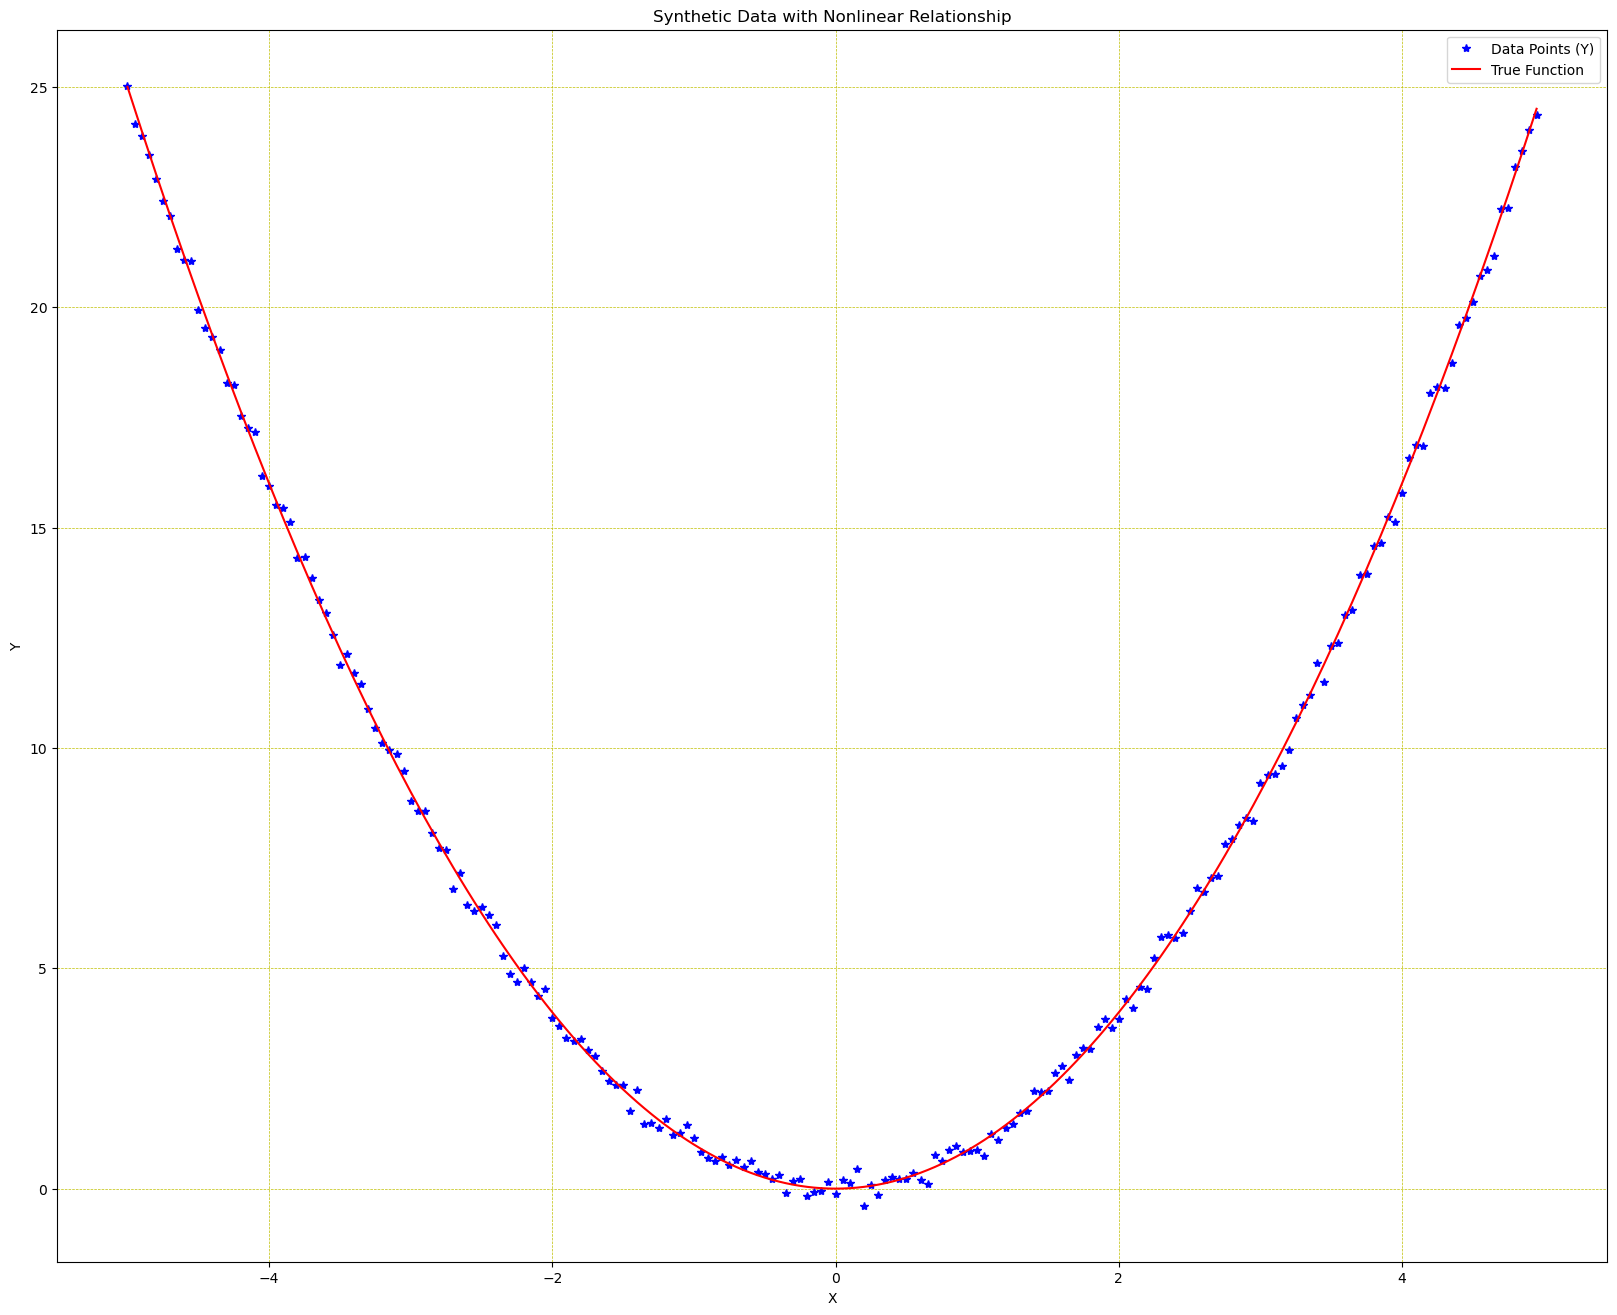

In [5]:
# visualize the data points
plt.figure(figsize=(20,16))
plt.plot(X, Y, 'b*', label="Data Points (Y)")
plt.plot(X, func, 'r-', label="True Function")
plt.title("Synthetic Data with Nonlinear Relationship")
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid(True, color='y', linestyle='--', linewidth=0.5)
plt.show()

In [6]:
# define forward pass for quadratic function
def forward(X):
    return w*X**2 + b

# define loss function - use MSE here 
def loss(y_pred, y):
    return torch.mean((y_pred - y)**2)

In [7]:
# inital w and b parameters 
w = torch.tensor(torch.randn(1), requires_grad=True)
b = torch.tensor(torch.randn(1), requires_grad=True)

# set step size and number of iterations
step_size = 1e-5 # this is the learning rate
loss_list = []
n_iter = 100 

# intial predictions
print("Prediction before training:", forward(10.0))

print("Len(X):", len(X))
batch_size = 20  # set batch size for mini-batch GD
n_batches = int(len(X) / batch_size)
print("Number of batches:", n_batches)

Prediction before training: tensor([-143.0771], grad_fn=<AddBackward0>)
Len(X): 200
Number of batches: 10


C:\Users\adria\AppData\Local\Temp\ipykernel_36236\4171146837.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  w = torch.tensor(torch.randn(1), requires_grad=True)
C:\Users\adria\AppData\Local\Temp\ipykernel_36236\4171146837.py:3: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  b = torch.tensor(torch.randn(1), requires_grad=True)


In [8]:
# for mini-batch GD, set batch size and update gradient after each batch
# create a pytorch dataloader for easy mini-batch processing
dataset = TensorDataset(X, Y)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# training loop to go over the data number of batches times 
for epoch in range(n_iter):
    # after each epoch, calculate loss over the entire dataset for comparison
    Y_pred = forward(X)
    
    epoch_loss = loss(Y_pred, Y).item()
    loss_list.append(epoch_loss)
    
    print(f"iteration: {epoch}, loss: {epoch_loss:.4f}, w: {w.item():.4f}, b: {b.item():.4f}")

    # mini batch updates 
    for X_batch, Y_batch in dataloader:
        Y_pred = forward(X_batch)
        batch_loss = loss(Y_pred, Y_batch)
        
        # compute gradients - backward pass 
        batch_loss.backward()
        
        # update parameters
        with torch.no_grad():
            w -= step_size * w.grad
            b -= step_size * b.grad
        
        # zero gradients
        w.grad.zero_()
        b.grad.zero_()

iteration: 0, loss: 719.5858, w: -1.4360, b: 0.5212
iteration: 1, loss: 684.2940, w: -1.3767, b: 0.5251
iteration: 2, loss: 650.7388, w: -1.3188, b: 0.5289
iteration: 3, loss: 618.8279, w: -1.2624, b: 0.5326
iteration: 4, loss: 588.4828, w: -1.2074, b: 0.5362
iteration: 5, loss: 559.6245, w: -1.1538, b: 0.5398
iteration: 6, loss: 532.1830, w: -1.1015, b: 0.5432
iteration: 7, loss: 506.0883, w: -1.0505, b: 0.5466
iteration: 8, loss: 481.2747, w: -1.0007, b: 0.5498
iteration: 9, loss: 457.6767, w: -0.9522, b: 0.5530
iteration: 10, loss: 435.2376, w: -0.9049, b: 0.5561
iteration: 11, loss: 413.8955, w: -0.8588, b: 0.5591
iteration: 12, loss: 393.6035, w: -0.8138, b: 0.5621
iteration: 13, loss: 374.3068, w: -0.7700, b: 0.5650
iteration: 14, loss: 355.9566, w: -0.7272, b: 0.5678
iteration: 15, loss: 338.5059, w: -0.6855, b: 0.5705
iteration: 16, loss: 321.9120, w: -0.6448, b: 0.5732
iteration: 17, loss: 306.1294, w: -0.6051, b: 0.5758
iteration: 18, loss: 291.1213, w: -0.5664, b: 0.5783
ite

Predict after training with MBGD: 10.0 tensor([76.5973], grad_fn=<AddBackward0>)


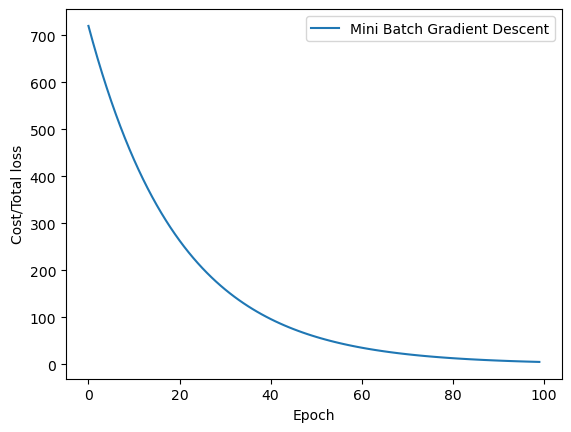

In [9]:
# plot (mini) BGD/SGD loss curve 
# Predict y after updating w
print('Predict after training with MBGD:', 10.0, forward(10.0))

# plot the figure (loss_BGD)
plt.plot(loss_list, label="Mini Batch Gradient Descent")
plt.xlabel('Epoch')
plt.ylabel('Cost/Total loss')
plt.legend()
plt.show()

Secondly, search the learnig rate between (0,1), and find the best learning rate for the **5-2**. Use the MNIST dataset.

In [10]:
# define hyperparameters
input_size = 28 * 28  # MNIST image size (flattened)
hidden_size = 100    # number of neurons in hidden layer
output_size = 10     # number of classes in MNIST
epochs = 10 # number of training epochs
batch_size = 1000 # number of samples per batch
learning_rate = 0.001 # learning rate for optimiser

In [11]:
# Download MNIST data
train_data = datasets.MNIST(root = './data', train = True,
                        transform = transforms.ToTensor(), download = True)

test_data = datasets.MNIST(root = './data', train = False,
                       transform = transforms.ToTensor(), download = True)

In [12]:
# Split dataset with DataLoader, train dataset and test dataset
train_gen = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
test_gen = torch.utils.data.DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

x_train, y_train = next(iter(train_gen))
print("x_train shape:", x_train.shape)
print("x_train size:", x_train.size())

x_train shape: torch.Size([1000, 1, 28, 28])
x_train size: torch.Size([1000, 1, 28, 28])


In [13]:
# Define neural network model
class Net(nn.Module):
  def __init__(self, input_size, hidden_size, output_size):
    super(Net, self).__init__()
    self.fc1 = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.fc2 = nn.Linear(hidden_size, output_size)
  
  def forward(self, x):
    out = self.fc1(x)
    out = self.relu(out)
    out = self.fc2(out)
    return out
  
# Build the model of neural network 

net = Net(input_size, hidden_size, output_size).to(device)
print(net)

Net(
  (fc1): Linear(in_features=784, out_features=100, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)


In [14]:
# Define loss function
loss_function = nn.CrossEntropyLoss()

# Learning rate search
lr_list = np.arange(0.0001, 0.01, 0.001)   # prepare a list of learning rates to test
num_epochs_per_lr = 5  # train each LR for 5 epochs 

# Store results for each LR
lr_results = []

# Save initial model state to reset before each LR test
initial_model_state = copy.deepcopy(net.state_dict())

for lr in lr_list:  # start loop
    print(f"\n{'='*50}")
    print(f"Testing Learning Rate: {lr:.4f}")
    print(f"{'='*50}")
    
    # Reset model to initial state
    net.load_state_dict(copy.deepcopy(initial_model_state))
    
    # Create optimizer with current LR
    optimizer = torch.optim.Adam(net.parameters(), lr=lr)
    
    # prepare to store epoch metrics for each LR 
    epoch_losses = []
    epoch_accuracies = []
    
    # start the training loop - we train each LR for 5 epochs 
    for epoch in range(num_epochs_per_lr):
        net.train() # set model to train mode 
        epoch_loss = 0  # reset epoch loss
        
        for i, (images, labels) in enumerate(train_gen):    # loop over training batches 
            images = torch.autograd.Variable(images.view(-1, 28*28))    # reshape images (flatten)
            labels = torch.autograd.Variable(labels)    # get labels

            optimizer.zero_grad()   # zero the gradients
            outputs = net(images)   # forward pass
            loss = loss_function(outputs, labels)   # compute loss
            loss.backward()  # backward pass
            optimizer.step()    # update weights
            
            epoch_loss += loss.item()   # accumulate loss for the epoch
        
        # Average loss for epoch
        avg_loss = epoch_loss / len(train_gen)
        
        # Evaluate on test set
        net.eval()
        correct = 0
        total = 0

        # this is important to not update the weights aka keep training
        with torch.no_grad():
            for images, labels in test_gen:
                images = torch.autograd.Variable(images.view(-1, 28*28))
                labels = torch.autograd.Variable(labels)
                
                outputs = net(images)
                _, predicted = torch.max(outputs, 1)
                
                correct += (predicted == labels).sum().item()
                total += labels.size(0)
        
        accuracy = 100 * correct / total    # compute accuracy
        
        epoch_losses.append(avg_loss)
        epoch_accuracies.append(accuracy)
        
        print(f"Epoch {epoch+1}/{num_epochs_per_lr} - Loss: {avg_loss:.4f}, Accuracy: {accuracy:.2f}%")
    
    # Store results for this LR (use final epoch's metrics)
    lr_results.append({
        'lr': lr,
        'final_loss': epoch_losses[-1],
        'final_accuracy': epoch_accuracies[-1],
        'best_accuracy': max(epoch_accuracies),
        'all_losses': epoch_losses,
        'all_accuracies': epoch_accuracies
    })
    
    print(f"LR {lr:.4f} - Final Accuracy: {epoch_accuracies[-1]:.2f}%, Best Accuracy: {max(epoch_accuracies):.2f}%")


Testing Learning Rate: 0.0001
Epoch 1/5 - Loss: 2.1398, Accuracy: 66.04%
Epoch 2/5 - Loss: 1.7092, Accuracy: 78.14%
Epoch 3/5 - Loss: 1.3028, Accuracy: 82.10%
Epoch 4/5 - Loss: 1.0097, Accuracy: 84.53%
Epoch 5/5 - Loss: 0.8153, Accuracy: 86.06%
LR 0.0001 - Final Accuracy: 86.06%, Best Accuracy: 86.06%

Testing Learning Rate: 0.0011
Epoch 1/5 - Loss: 1.0153, Accuracy: 89.47%
Epoch 2/5 - Loss: 0.3520, Accuracy: 91.77%
Epoch 3/5 - Loss: 0.2831, Accuracy: 92.53%
Epoch 4/5 - Loss: 0.2457, Accuracy: 93.62%
Epoch 5/5 - Loss: 0.2174, Accuracy: 94.23%
LR 0.0011 - Final Accuracy: 94.23%, Best Accuracy: 94.23%

Testing Learning Rate: 0.0021
Epoch 1/5 - Loss: 0.7331, Accuracy: 91.08%
Epoch 2/5 - Loss: 0.2825, Accuracy: 92.94%
Epoch 3/5 - Loss: 0.2267, Accuracy: 94.12%
Epoch 4/5 - Loss: 0.1865, Accuracy: 94.88%
Epoch 5/5 - Loss: 0.1588, Accuracy: 95.46%
LR 0.0021 - Final Accuracy: 95.46%, Best Accuracy: 95.46%

Testing Learning Rate: 0.0031
Epoch 1/5 - Loss: 0.6258, Accuracy: 91.64%
Epoch 2/5 - Lo


Best Learning Rate: 0.0091
Best Accuracy: 97.32%


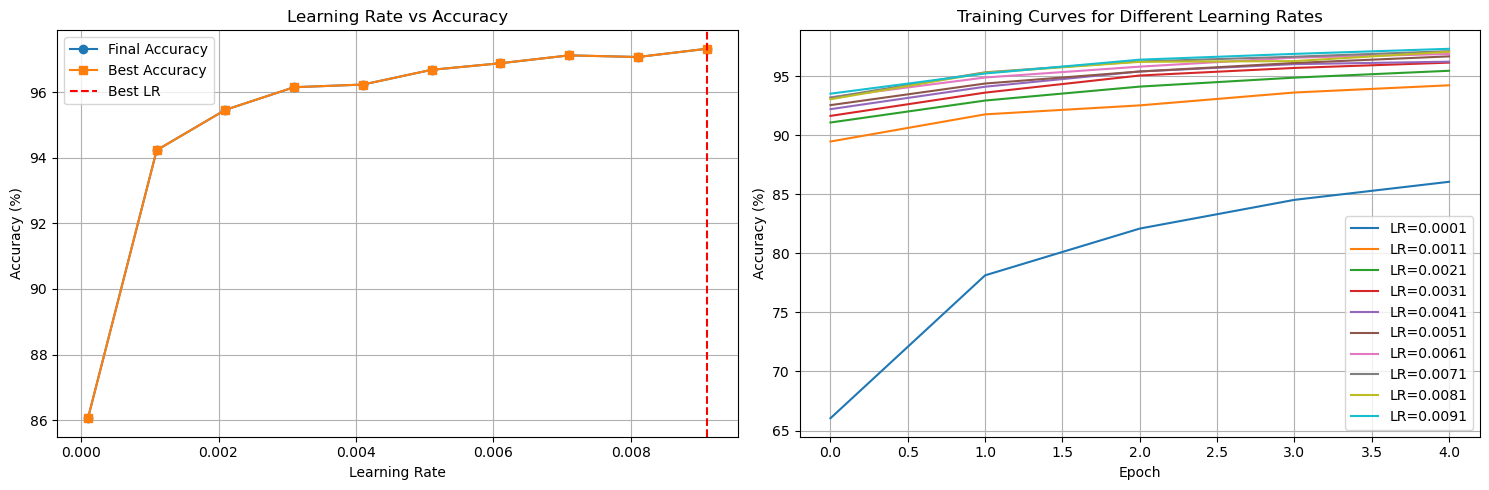

In [15]:
# Find best learning rate
best_lr_result = max(lr_results, key=lambda x: x['best_accuracy'])
print(f"\n{'='*50}")
print(f"Best Learning Rate: {best_lr_result['lr']:.4f}")
print(f"Best Accuracy: {best_lr_result['best_accuracy']:.2f}%")
print(f"{'='*50}")

# Visualize results
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Plot final accuracy vs LR
lrs = [r['lr'] for r in lr_results]
final_accs = [r['final_accuracy'] for r in lr_results]
best_accs = [r['best_accuracy'] for r in lr_results]

ax1.plot(lrs, final_accs, 'o-', label='Final Accuracy')
ax1.plot(lrs, best_accs, 's-', label='Best Accuracy')
ax1.axvline(best_lr_result['lr'], color='r', linestyle='--', label='Best LR')
ax1.set_xlabel('Learning Rate')
ax1.set_ylabel('Accuracy (%)')
ax1.set_title('Learning Rate vs Accuracy')
ax1.legend()
ax1.grid(True)

# Plot training curves for each LR
for result in lr_results:
    ax2.plot(result['all_accuracies'], label=f"LR={result['lr']:.4f}")
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy (%)')
ax2.set_title('Training Curves for Different Learning Rates')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()

Lastly, using the Fashion MNIST dataset, how can you improve the accuracy?
Please explore any method to achieve a much higher accuracy. For example, you can change the network model by add more layers, tune hypaerparameters, or any other ideas to obtain a better results.


In [16]:
import torchvision
import matplotlib.pyplot as plt
from torch import nn, optim
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np

In [17]:
# i will use a CNN instead of MLP for better performance on image data
# load dataset
train_data = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transforms.Compose([transforms.ToTensor()]))
test_data = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transforms.Compose([transforms.ToTensor()]))

# split dataset with DataLoader
train_dataset = torch.utils.data.DataLoader(dataset=train_data, batch_size=1000, shuffle=True)
test_dataset = torch.utils.data.DataLoader(dataset=test_data, batch_size=1000, shuffle=False)

In [18]:
# define CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3)    # output: (32, 26, 26)
        self.conv2 = nn.Conv2d(32, 64, 3)   # output: (64, 11, 11)

        self.fc1 = nn.Linear(64*11*11, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        input_size = x.size(0)

        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2, 2)

        x = self.conv2(x)
        x = F.relu(x)

        x = x.view(input_size, -1)
        x = self.fc1(x)
        x = F.relu(x)

        x = self.fc2(x)
        return F.log_softmax(x, dim=1)


In [19]:
# create object of CNN 
net = CNN()
print(net)  # look at the architecture

CNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=7744, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)


In [20]:
# hyperparams and loss function
learning_rate = 0.01 # for Adam optimiser
batch_size = 100
epochs = 10
loss_function = nn.CrossEntropyLoss()
optimiser = optim.Adam(net.parameters(), lr=learning_rate)

In [21]:
# print the number of samples in train and test dataset
print(len(train_dataset.dataset))
print(len(test_dataset.dataset))

60000
10000


In [23]:
# train model 
loss_list = []
accuracy_list = []
for i in range(epochs):
    print(f"Epoch {i}\n--------------------------------------")
    net.train()
    epoch_loss = 0
    
    for batch_idx, (images, labels) in enumerate(train_dataset):
        images = images.view(-1, 1, 28, 28)  # ensure channel dimension

        # Forward pass
        outputs = net(images)
        loss = loss_function(outputs, labels)
        
        # Backward pass and optimize
        optimiser.zero_grad()   # correct optimizer
        loss.backward()
        optimiser.step()
        
        epoch_loss += loss.item()
    
    avg_loss = epoch_loss / len(train_dataset)
    loss_list.append(avg_loss)
    print(f"Epoch [{i+1}/{epochs}], Loss: {avg_loss:.4f}")
    
    # Evaluate on test set
    net.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_dataset:
            images = images.view(-1, 1, 28, 28)  # ensure channel dimension
            outputs = net(images)
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / total
    accuracy_list.append(accuracy)
    print(f"Test Accuracy: {accuracy:.2f}%\n")

Epoch 0
--------------------------------------
Epoch [1/10], Loss: 0.0066
Test Accuracy: 98.85%

Epoch 1
--------------------------------------
Epoch [2/10], Loss: 0.0061
Test Accuracy: 98.86%

Epoch 2
--------------------------------------
Epoch [3/10], Loss: 0.0062
Test Accuracy: 98.85%

Epoch 3
--------------------------------------
Epoch [4/10], Loss: 0.0063
Test Accuracy: 98.78%

Epoch 4
--------------------------------------
Epoch [5/10], Loss: 0.0056
Test Accuracy: 98.84%

Epoch 5
--------------------------------------
Epoch [6/10], Loss: 0.0073
Test Accuracy: 98.90%

Epoch 6
--------------------------------------
Epoch [7/10], Loss: 0.0055
Test Accuracy: 98.40%

Epoch 7
--------------------------------------
Epoch [8/10], Loss: 0.0092
Test Accuracy: 98.91%

Epoch 8
--------------------------------------
Epoch [9/10], Loss: 0.0053
Test Accuracy: 98.77%

Epoch 9
--------------------------------------
Epoch [10/10], Loss: 0.0040
Test Accuracy: 98.93%



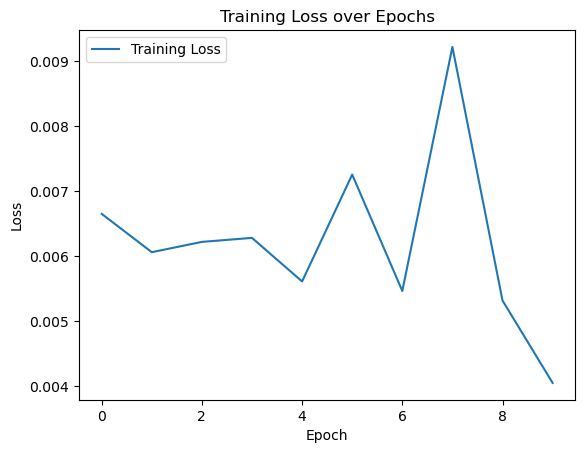

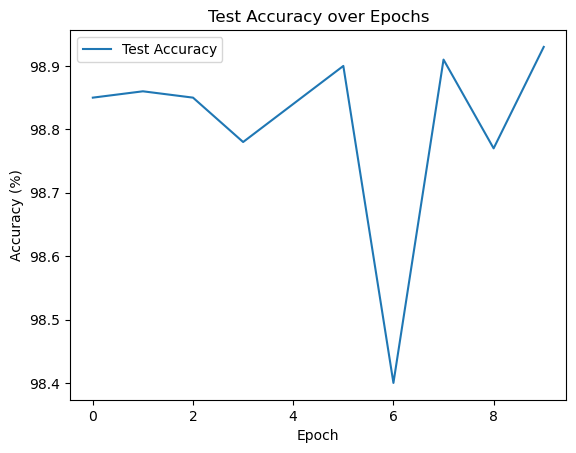

In [24]:
# plot loss and accuracy curves over epochs 

# loss
plt.plot(loss_list, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

# accuracy
plt.plot(accuracy_list, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Test Accuracy over Epochs')
plt.legend()
plt.show()

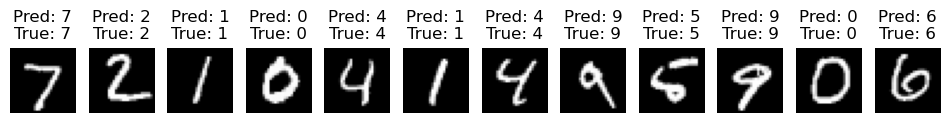

In [30]:
# visualise predictions
dataiter = iter(test_dataset)
images, labels = next(dataiter)

images = images.view(-1, 1, 28, 28)  # reshape
outputs = net(images)
_, preds = torch.max(outputs, 1)

fig, axes = plt.subplots(1, 12, figsize=(12, 4))
for idx in range(12):
    axes[idx].imshow(images[idx].squeeze(), cmap='gray')
    axes[idx].set_title(f'Pred: {preds[idx].item()}\nTrue: {labels[idx].item()}')
    axes[idx].axis('off')
plt.show()

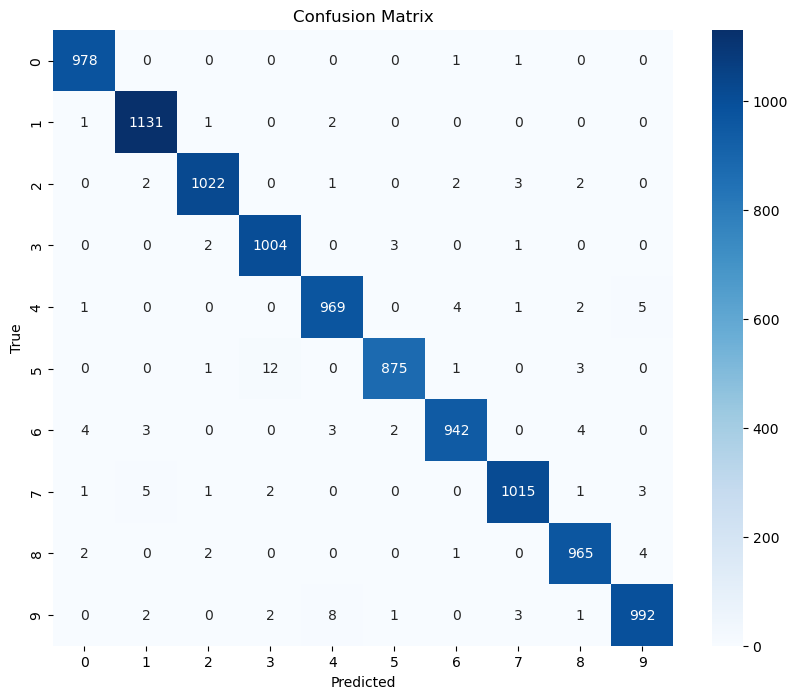

In [31]:
# confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in test_dataset:
        images = images.view(-1, 1, 28, 28)
        outputs = net(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.numpy())
        all_labels.extend(labels.numpy())

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()